In [1]:
# import from parent directory
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
sys.path.append("..")
from labplot import *

In [20]:
# with spike, only E shared

trials = collect_data("../../outputs/conductance/double_lif/delta_synapse/spike_reset/nu_x_E/20251112-113532-djT8C7hW")

c_e, c_i = 1.0, 0.0

rows = []
for params, results in trials:
    row = {}
    if params["c_e"] == c_e and params["c_i"] == c_i:
        row.update(params)
        for k, v in results.items():
            if np.ndim(v) == 0 or (isinstance(v, np.ndarray) and v.size == 1):
                row[k] = float(np.ravel(v)[0])
            elif (isinstance(v, np.ndarray) and v.size == 2):
                row[k+"_1"] = float(v[0])
                row[k+"_2"] = float(v[1])
        rows.append(row)
df = pd.DataFrame(rows)
df = df.sort_values(by="nu_x")
df_E_S = df.copy()

In [22]:
# with spike, only E shared

trials = collect_data("../../outputs/conductance/double_lif/delta_synapse/spike_reset/refractory/nu_x_I/20251112-113819-U5vu0T71")

c_e, c_i = 0, 1

rows = []
for params, results in trials:
    row = {}
    if params["c_e"] == c_e and params["c_i"] == c_i:
        row.update(params)
        for k, v in results.items():
            if np.ndim(v) == 0 or (isinstance(v, np.ndarray) and v.size == 1):
                row[k] = float(np.ravel(v)[0])
            elif (isinstance(v, np.ndarray) and v.size == 2):
                row[k+"_1"] = float(v[0])
                row[k+"_2"] = float(v[1])
        rows.append(row)
df = pd.DataFrame(rows)
df = df.sort_values(by="nu_x")
df_I_S = df.copy()

/var/folders/mb/f1_g1g0n1s13vfylsby2v1bm0000gn/T/ipykernel_9794/4284741374.py:60: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False)


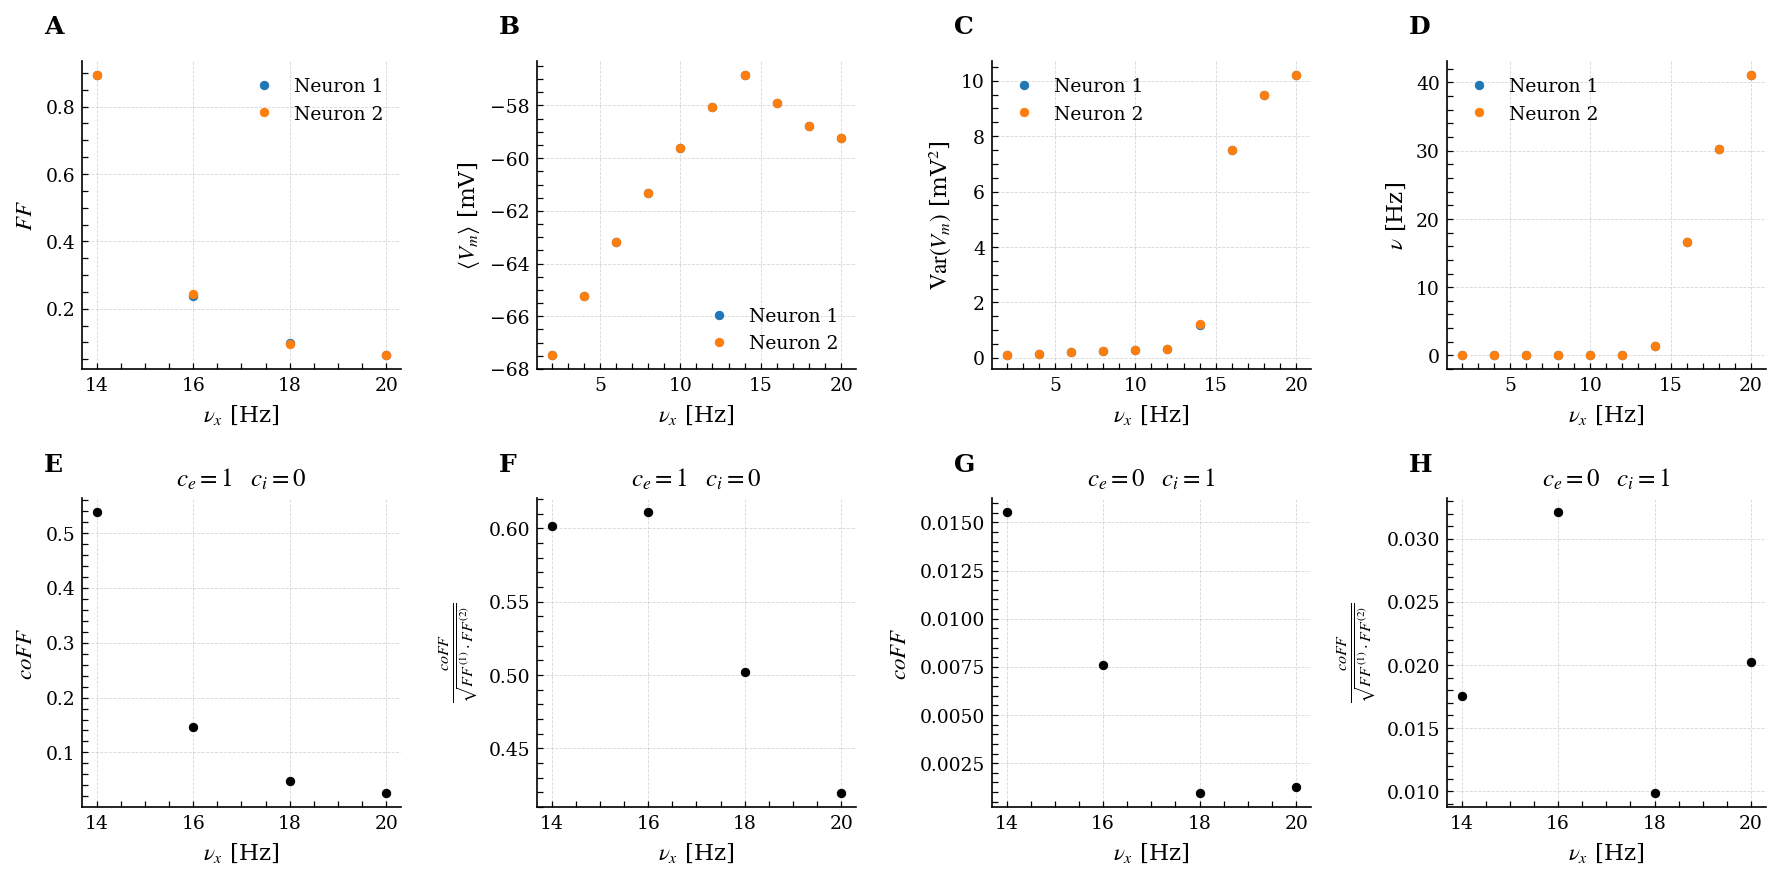

In [23]:
set_style()
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(2, 4, figure=fig)

# marginal statistics, E shared with spike

ax = fig.add_subplot(gs[0, 0])
ax.plot(df_E_S["nu_x"], df_E_S["fano_factor_1"], 'o', label="Neuron 1")
ax.plot(df_E_S["nu_x"], df_E_S["fano_factor_2"], 'o', label="Neuron 2")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$FF$")

ax = fig.add_subplot(gs[0, 1])
ax.plot(df_E_S["nu_x"], df_E_S["mean_V_1"], 'o', label="Neuron 1")
ax.plot(df_E_S["nu_x"], df_E_S["mean_V_2"], 'o', label="Neuron 2")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\langle V_m \rangle$ [mV]")

ax = fig.add_subplot(gs[0, 2])
ax.plot(df_E_S["nu_x"], df_E_S["var_V_1"], 'o', label="Neuron 1")
ax.plot(df_E_S["nu_x"], df_E_S["var_V_2"], 'o', label="Neuron 2")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Var}(V_m)$ [mV$^2$]")

ax = fig.add_subplot(gs[0, 3])
ax.plot(df_E_S["nu_x"], df_E_S["nu_1"], 'o', label="Neuron 1")
ax.plot(df_E_S["nu_x"], df_E_S["nu_2"], 'o', label="Neuron 2")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\nu$ [Hz]")

# joint staitistics, E shared with spike

ax = fig.add_subplot(gs[1, 0])
ax.plot(df_E_S["nu_x"], df_E_S["co_fano_factor"], 'o', color="black")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$coFF$")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)

ax = fig.add_subplot(gs[1, 1])
ax.plot(df_E_S["nu_x"], df_E_S["co_fano_factor"] / np.sqrt(df_E_S["fano_factor_1"] * df_E_S["fano_factor_2"]), 'o', color="black")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\frac{coFF}{\sqrt{FF^{(1)} \cdot FF^{(2)}}}$")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)

# joint statistics, I shared with spike
ax = fig.add_subplot(gs[1, 2])
ax.plot(df_I_S["nu_x"], df_I_S["co_fano_factor"], 'o', color="black")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$coFF$")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)

ax = fig.add_subplot(gs[1, 3])
ax.plot(df_I_S["nu_x"], df_I_S["co_fano_factor"] / np.sqrt(df_I_S["fano_factor_1"] * df_I_S["fano_factor_2"]), 'o', color="black")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\frac{coFF}{\sqrt{FF^{(1)} \cdot FF^{(2)}}}$")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)

for i, ax in enumerate(fig.axes):
    ax.tick_params(which="both", width=0.6, length=3)
    ax.legend(frameon=False)
    # ax.set_xlim(left=7)
    ax.text(-0.12, 1.15, chr(65+i), transform=ax.transAxes,
            fontsize=12, fontweight='bold', va="top", ha="left")

plt.tight_layout()
# savefig(fig, "fig1.png")
plt.show()

# Delta Synapse With Spikes No Refractory

In [36]:
# with spike, only E shared

trials = collect_data("../../outputs/conductance/double_lif/delta_synapse/spike_reset/no_refractory/nu_x_E/20251112-120739-BTxryTy5")

c_e, c_i = 1.0, 0.0

rows = []
for params, results in trials:
    row = {}
    if params["c_e"] == c_e and params["c_i"] == c_i:
        row.update(params)
        for k, v in results.items():
            if np.ndim(v) == 0 or (isinstance(v, np.ndarray) and v.size == 1):
                row[k] = float(np.ravel(v)[0])
            elif (isinstance(v, np.ndarray) and v.size == 2):
                row[k+"_1"] = float(v[0])
                row[k+"_2"] = float(v[1])
        rows.append(row)
df = pd.DataFrame(rows)
df = df.sort_values(by="nu_x")
df_E_S = df.copy()

In [37]:
# with spike, only I shared

trials = collect_data("../../outputs/conductance/double_lif/delta_synapse/spike_reset/no_refractory/nu_x_I/20251112-120837-1DOyGPtG")

c_e, c_i = 0, 1

rows = []
for params, results in trials:
    row = {}
    if params["c_e"] == c_e and params["c_i"] == c_i:
        row.update(params)
        for k, v in results.items():
            if np.ndim(v) == 0 or (isinstance(v, np.ndarray) and v.size == 1):
                row[k] = float(np.ravel(v)[0])
            elif (isinstance(v, np.ndarray) and v.size == 2):
                row[k+"_1"] = float(v[0])
                row[k+"_2"] = float(v[1])
        rows.append(row)
df = pd.DataFrame(rows)
df = df.sort_values(by="nu_x")
df_I_S = df.copy()

/var/folders/mb/f1_g1g0n1s13vfylsby2v1bm0000gn/T/ipykernel_9794/4284741374.py:60: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False)


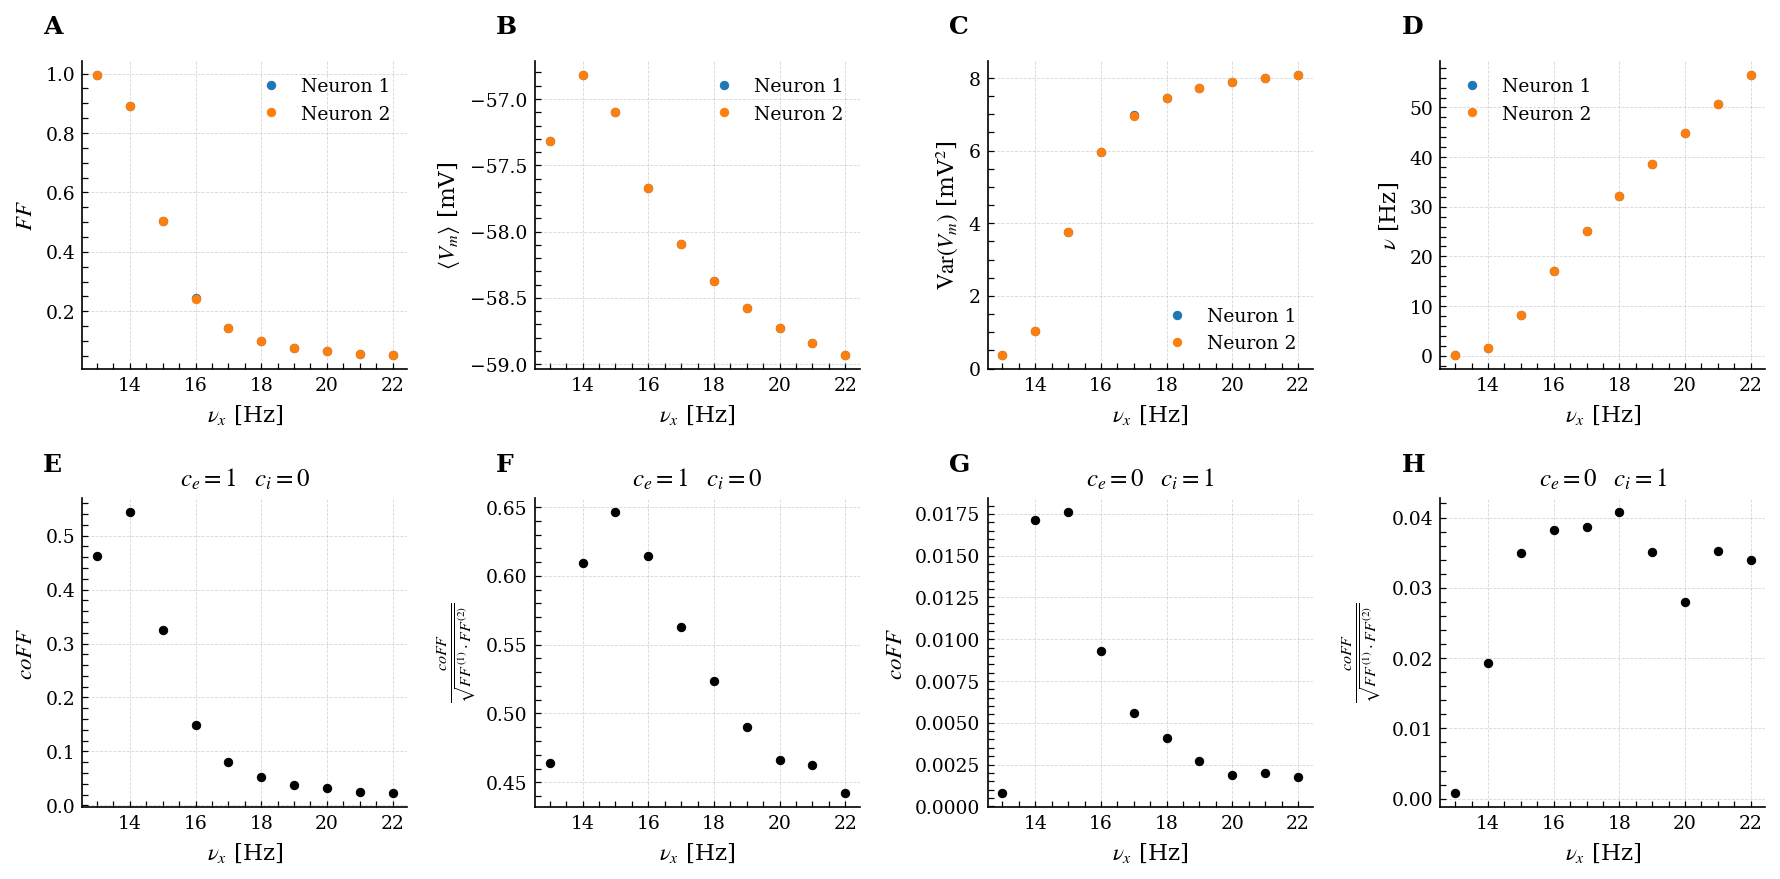

In [38]:
set_style()
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(2, 4, figure=fig)

# marginal statistics, E shared with spike

ax = fig.add_subplot(gs[0, 0])
ax.plot(df_E_S["nu_x"], df_E_S["fano_factor_1"], 'o', label="Neuron 1")
ax.plot(df_E_S["nu_x"], df_E_S["fano_factor_2"], 'o', label="Neuron 2")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$FF$")

ax = fig.add_subplot(gs[0, 1])
ax.plot(df_E_S["nu_x"], df_E_S["mean_V_1"], 'o', label="Neuron 1")
ax.plot(df_E_S["nu_x"], df_E_S["mean_V_2"], 'o', label="Neuron 2")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\langle V_m \rangle$ [mV]")

ax = fig.add_subplot(gs[0, 2])
ax.plot(df_E_S["nu_x"], df_E_S["var_V_1"], 'o', label="Neuron 1")
ax.plot(df_E_S["nu_x"], df_E_S["var_V_2"], 'o', label="Neuron 2")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Var}(V_m)$ [mV$^2$]")

ax = fig.add_subplot(gs[0, 3])
ax.plot(df_E_S["nu_x"], df_E_S["nu_1"], 'o', label="Neuron 1")
ax.plot(df_E_S["nu_x"], df_E_S["nu_2"], 'o', label="Neuron 2")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\nu$ [Hz]")

# joint staitistics, E shared with spike

ax = fig.add_subplot(gs[1, 0])
ax.plot(df_E_S["nu_x"], df_E_S["co_fano_factor"], 'o', color="black")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$coFF$")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)

ax = fig.add_subplot(gs[1, 1])
ax.plot(df_E_S["nu_x"], df_E_S["co_fano_factor"] / np.sqrt(df_E_S["fano_factor_1"] * df_E_S["fano_factor_2"]), 'o', color="black")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\frac{coFF}{\sqrt{FF^{(1)} \cdot FF^{(2)}}}$")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)

# joint statistics, I shared with spike
ax = fig.add_subplot(gs[1, 2])
ax.plot(df_I_S["nu_x"], df_I_S["co_fano_factor"], 'o', color="black")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$coFF$")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)

ax = fig.add_subplot(gs[1, 3])
ax.plot(df_I_S["nu_x"], df_I_S["co_fano_factor"] / np.sqrt(df_I_S["fano_factor_1"] * df_I_S["fano_factor_2"]), 'o', color="black")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\frac{coFF}{\sqrt{FF^{(1)} \cdot FF^{(2)}}}$")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)

for i, ax in enumerate(fig.axes):
    ax.tick_params(which="both", width=0.6, length=3)
    ax.legend(frameon=False)
    # ax.set_xlim(left=7)
    ax.text(-0.12, 1.15, chr(65+i), transform=ax.transAxes,
            fontsize=12, fontweight='bold', va="top", ha="left")

plt.tight_layout()
# savefig(fig, "fig1.png")
plt.show()

# Delta Synapse No Spike-Reset

In [40]:
# with spike, only E shared

trials = collect_data("../../outputs/conductance/double_lif/delta_synapse/no_spike_reset/nu_x_E/20251112-121717-oKDEHStv")

c_e, c_i = 1.0, 0.0

rows = []
for params, results in trials:
    row = {}
    if params["c_e"] == c_e and params["c_i"] == c_i:
        row.update(params)
        for k, v in results.items():
            if np.ndim(v) == 0 or (isinstance(v, np.ndarray) and v.size == 1):
                row[k] = float(np.ravel(v)[0])
            elif (isinstance(v, np.ndarray) and v.size == 2):
                row[k+"_1"] = float(v[0])
                row[k+"_2"] = float(v[1])
        rows.append(row)
df = pd.DataFrame(rows)
df = df.sort_values(by="nu_x")
df_E_S = df.copy()

# with spike, only I shared

trials = collect_data("../../outputs/conductance/double_lif/delta_synapse/no_spike_reset/nu_x_I/20251112-121629-oQgHebqR")

c_e, c_i = 0, 1

rows = []
for params, results in trials:
    row = {}
    if params["c_e"] == c_e and params["c_i"] == c_i:
        row.update(params)
        for k, v in results.items():
            if np.ndim(v) == 0 or (isinstance(v, np.ndarray) and v.size == 1):
                row[k] = float(np.ravel(v)[0])
            elif (isinstance(v, np.ndarray) and v.size == 2):
                row[k+"_1"] = float(v[0])
                row[k+"_2"] = float(v[1])
        rows.append(row)
df = pd.DataFrame(rows)
df = df.sort_values(by="nu_x")
df_I_S = df.copy()

/var/folders/mb/f1_g1g0n1s13vfylsby2v1bm0000gn/T/ipykernel_9794/4284741374.py:60: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False)


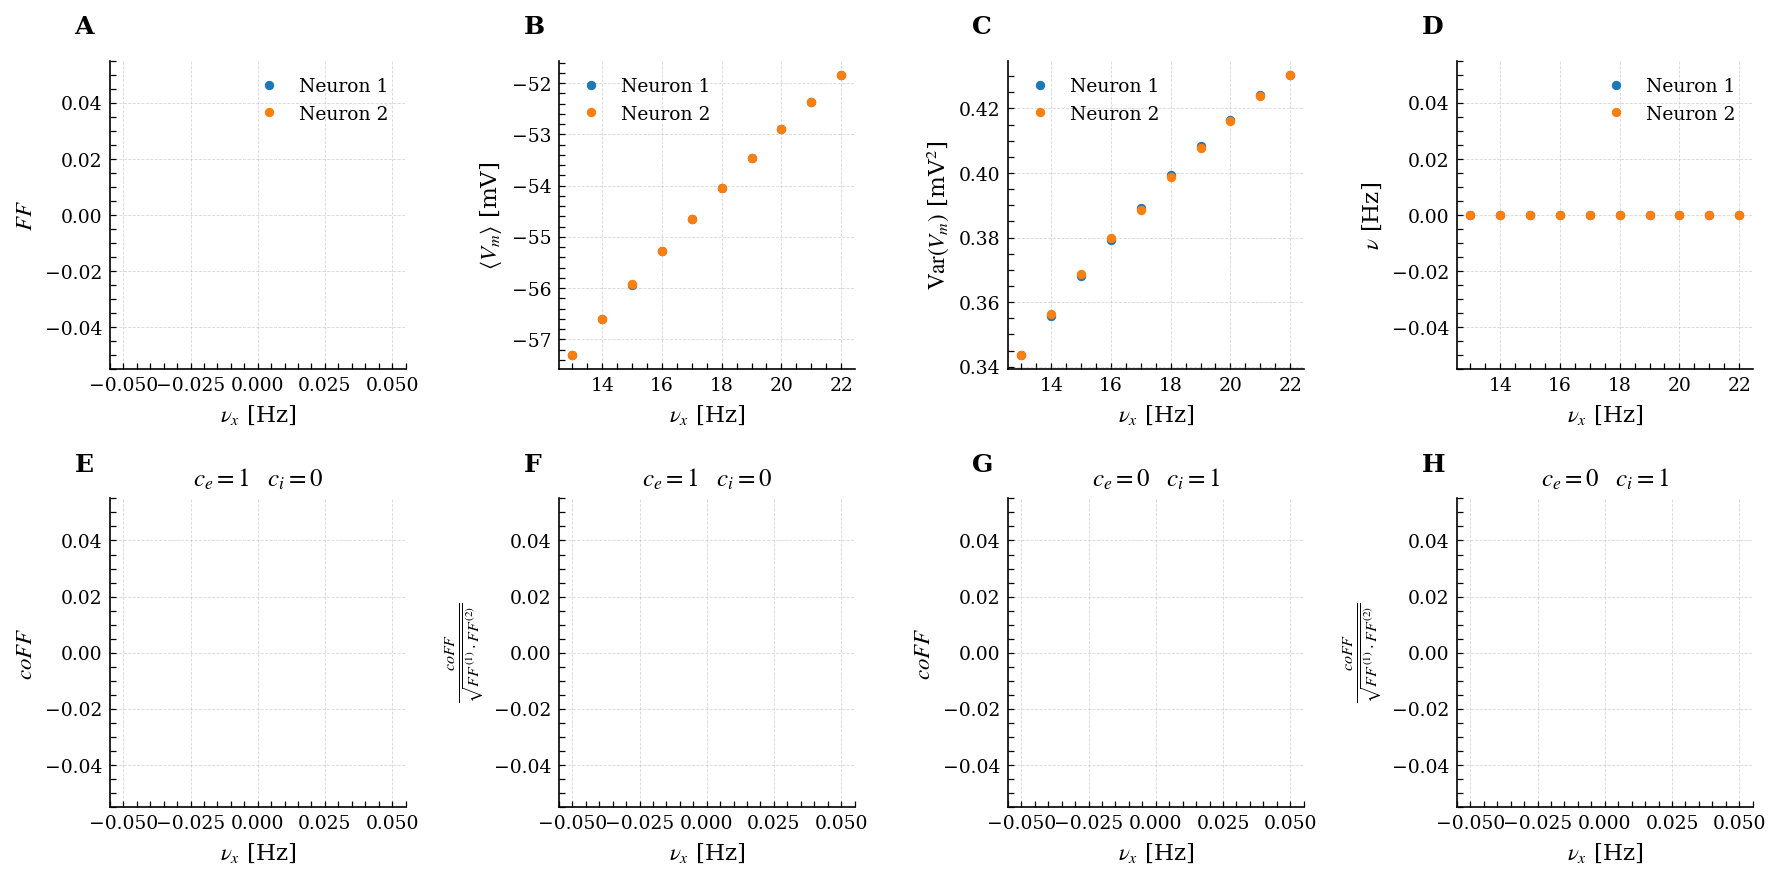

In [41]:
set_style()
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(2, 4, figure=fig)

# marginal statistics, E shared with spike

ax = fig.add_subplot(gs[0, 0])
ax.plot(df_E_S["nu_x"], df_E_S["fano_factor_1"], 'o', label="Neuron 1")
ax.plot(df_E_S["nu_x"], df_E_S["fano_factor_2"], 'o', label="Neuron 2")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$FF$")

ax = fig.add_subplot(gs[0, 1])
ax.plot(df_E_S["nu_x"], df_E_S["mean_V_1"], 'o', label="Neuron 1")
ax.plot(df_E_S["nu_x"], df_E_S["mean_V_2"], 'o', label="Neuron 2")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\langle V_m \rangle$ [mV]")

ax = fig.add_subplot(gs[0, 2])
ax.plot(df_E_S["nu_x"], df_E_S["var_V_1"], 'o', label="Neuron 1")
ax.plot(df_E_S["nu_x"], df_E_S["var_V_2"], 'o', label="Neuron 2")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Var}(V_m)$ [mV$^2$]")

ax = fig.add_subplot(gs[0, 3])
ax.plot(df_E_S["nu_x"], df_E_S["nu_1"], 'o', label="Neuron 1")
ax.plot(df_E_S["nu_x"], df_E_S["nu_2"], 'o', label="Neuron 2")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\nu$ [Hz]")

# joint staitistics, E shared with spike

ax = fig.add_subplot(gs[1, 0])
ax.plot(df_E_S["nu_x"], df_E_S["co_fano_factor"], 'o', color="black")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$coFF$")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)

ax = fig.add_subplot(gs[1, 1])
ax.plot(df_E_S["nu_x"], df_E_S["co_fano_factor"] / np.sqrt(df_E_S["fano_factor_1"] * df_E_S["fano_factor_2"]), 'o', color="black")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\frac{coFF}{\sqrt{FF^{(1)} \cdot FF^{(2)}}}$")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)

# joint statistics, I shared with spike
ax = fig.add_subplot(gs[1, 2])
ax.plot(df_I_S["nu_x"], df_I_S["co_fano_factor"], 'o', color="black")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$coFF$")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)

ax = fig.add_subplot(gs[1, 3])
ax.plot(df_I_S["nu_x"], df_I_S["co_fano_factor"] / np.sqrt(df_I_S["fano_factor_1"] * df_I_S["fano_factor_2"]), 'o', color="black")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\frac{coFF}{\sqrt{FF^{(1)} \cdot FF^{(2)}}}$")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)

for i, ax in enumerate(fig.axes):
    ax.tick_params(which="both", width=0.6, length=3)
    ax.legend(frameon=False)
    # ax.set_xlim(left=7)
    ax.text(-0.12, 1.15, chr(65+i), transform=ax.transAxes,
            fontsize=12, fontweight='bold', va="top", ha="left")

plt.tight_layout()
# savefig(fig, "fig1.png")
plt.show()

In [45]:
# with spike, only E shared

trials = collect_data("../../outputs/conductance/double_lif/delta_synapse/spike_reset/no_refractory/current/nu_x_E/20251112-124913-hmOaeweg")

c_e, c_i = 1.0, 0.0

rows = []
for params, results in trials:
    row = {}
    if params["c_e"] == c_e and params["c_i"] == c_i:
        row.update(params)
        for k, v in results.items():
            if np.ndim(v) == 0 or (isinstance(v, np.ndarray) and v.size == 1):
                row[k] = float(np.ravel(v)[0])
            elif (isinstance(v, np.ndarray) and v.size == 2):
                row[k+"_1"] = float(v[0])
                row[k+"_2"] = float(v[1])
        rows.append(row)
df = pd.DataFrame(rows)
df = df.sort_values(by="nu_x")
df_E_S = df.copy()

# with spike, only I shared

trials = collect_data("../../outputs/conductance/double_lif/delta_synapse/spike_reset/no_refractory/current/nu_x_I/20251112-125001-cszPoSBW")

c_e, c_i = 0, 1

rows = []
for params, results in trials:
    row = {}
    if params["c_e"] == c_e and params["c_i"] == c_i:
        row.update(params)
        for k, v in results.items():
            if np.ndim(v) == 0 or (isinstance(v, np.ndarray) and v.size == 1):
                row[k] = float(np.ravel(v)[0])
            elif (isinstance(v, np.ndarray) and v.size == 2):
                row[k+"_1"] = float(v[0])
                row[k+"_2"] = float(v[1])
        rows.append(row)
df = pd.DataFrame(rows)
df = df.sort_values(by="nu_x")
df_I_S = df.copy()

/var/folders/mb/f1_g1g0n1s13vfylsby2v1bm0000gn/T/ipykernel_9794/4284741374.py:60: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False)


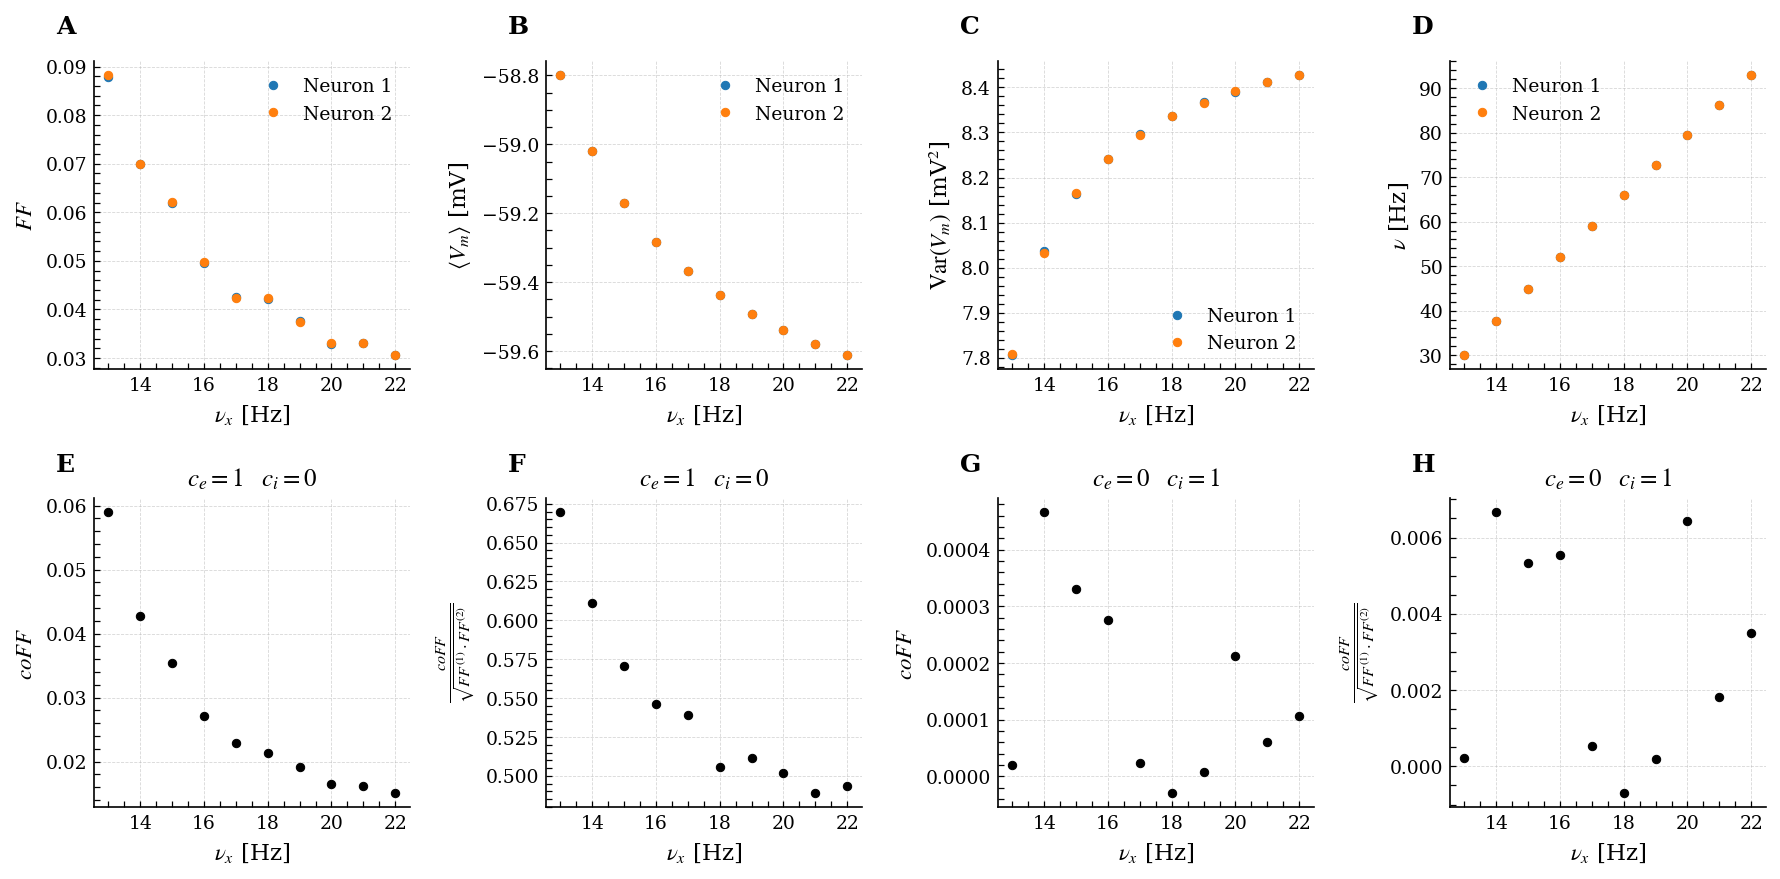

In [46]:
set_style()
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(2, 4, figure=fig)

# marginal statistics, E shared with spike

ax = fig.add_subplot(gs[0, 0])
ax.plot(df_E_S["nu_x"], df_E_S["fano_factor_1"], 'o', label="Neuron 1")
ax.plot(df_E_S["nu_x"], df_E_S["fano_factor_2"], 'o', label="Neuron 2")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$FF$")

ax = fig.add_subplot(gs[0, 1])
ax.plot(df_E_S["nu_x"], df_E_S["mean_V_1"], 'o', label="Neuron 1")
ax.plot(df_E_S["nu_x"], df_E_S["mean_V_2"], 'o', label="Neuron 2")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\langle V_m \rangle$ [mV]")

ax = fig.add_subplot(gs[0, 2])
ax.plot(df_E_S["nu_x"], df_E_S["var_V_1"], 'o', label="Neuron 1")
ax.plot(df_E_S["nu_x"], df_E_S["var_V_2"], 'o', label="Neuron 2")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Var}(V_m)$ [mV$^2$]")

ax = fig.add_subplot(gs[0, 3])
ax.plot(df_E_S["nu_x"], df_E_S["nu_1"], 'o', label="Neuron 1")
ax.plot(df_E_S["nu_x"], df_E_S["nu_2"], 'o', label="Neuron 2")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\nu$ [Hz]")

# joint staitistics, E shared with spike

ax = fig.add_subplot(gs[1, 0])
ax.plot(df_E_S["nu_x"], df_E_S["co_fano_factor"], 'o', color="black")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$coFF$")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)

ax = fig.add_subplot(gs[1, 1])
ax.plot(df_E_S["nu_x"], df_E_S["co_fano_factor"] / np.sqrt(df_E_S["fano_factor_1"] * df_E_S["fano_factor_2"]), 'o', color="black")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\frac{coFF}{\sqrt{FF^{(1)} \cdot FF^{(2)}}}$")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)

# joint statistics, I shared with spike
ax = fig.add_subplot(gs[1, 2])
ax.plot(df_I_S["nu_x"], df_I_S["co_fano_factor"], 'o', color="black")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$coFF$")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)

ax = fig.add_subplot(gs[1, 3])
ax.plot(df_I_S["nu_x"], df_I_S["co_fano_factor"] / np.sqrt(df_I_S["fano_factor_1"] * df_I_S["fano_factor_2"]), 'o', color="black")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\frac{coFF}{\sqrt{FF^{(1)} \cdot FF^{(2)}}}$")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)

for i, ax in enumerate(fig.axes):
    ax.tick_params(which="both", width=0.6, length=3)
    ax.legend(frameon=False)
    # ax.set_xlim(left=7)
    ax.text(-0.12, 1.15, chr(65+i), transform=ax.transAxes,
            fontsize=12, fontweight='bold', va="top", ha="left")

plt.tight_layout()
# savefig(fig, "fig1.png")
plt.show()

In [49]:
# with spike, only E shared

trials = collect_data("../../outputs/conductance/double_lif/delta_synapse/spike_reset/no_refractory/current/nu_x_E/20251112-131224-aXJKO6El")

c_e, c_i = 0.1, 0.0

rows = []
for params, results in trials:
    row = {}
    if params["c_e"] == c_e and params["c_i"] == c_i:
        row.update(params)
        for k, v in results.items():
            if np.ndim(v) == 0 or (isinstance(v, np.ndarray) and v.size == 1):
                row[k] = float(np.ravel(v)[0])
            elif (isinstance(v, np.ndarray) and v.size == 2):
                row[k+"_1"] = float(v[0])
                row[k+"_2"] = float(v[1])
        rows.append(row)
df = pd.DataFrame(rows)
df = df.sort_values(by="nu_x")
df_E_S = df.copy()

# with spike, only I shared

trials = collect_data("../../outputs/conductance/double_lif/delta_synapse/spike_reset/no_refractory/current/nu_x_I/20251112-125001-cszPoSBW")

c_e, c_i = 0, 1

rows = []
for params, results in trials:
    row = {}
    if params["c_e"] == c_e and params["c_i"] == c_i:
        row.update(params)
        for k, v in results.items():
            if np.ndim(v) == 0 or (isinstance(v, np.ndarray) and v.size == 1):
                row[k] = float(np.ravel(v)[0])
            elif (isinstance(v, np.ndarray) and v.size == 2):
                row[k+"_1"] = float(v[0])
                row[k+"_2"] = float(v[1])
        rows.append(row)
df = pd.DataFrame(rows)
df = df.sort_values(by="nu_x")
df_I_S = df.copy()

/var/folders/mb/f1_g1g0n1s13vfylsby2v1bm0000gn/T/ipykernel_9794/4284741374.py:60: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False)


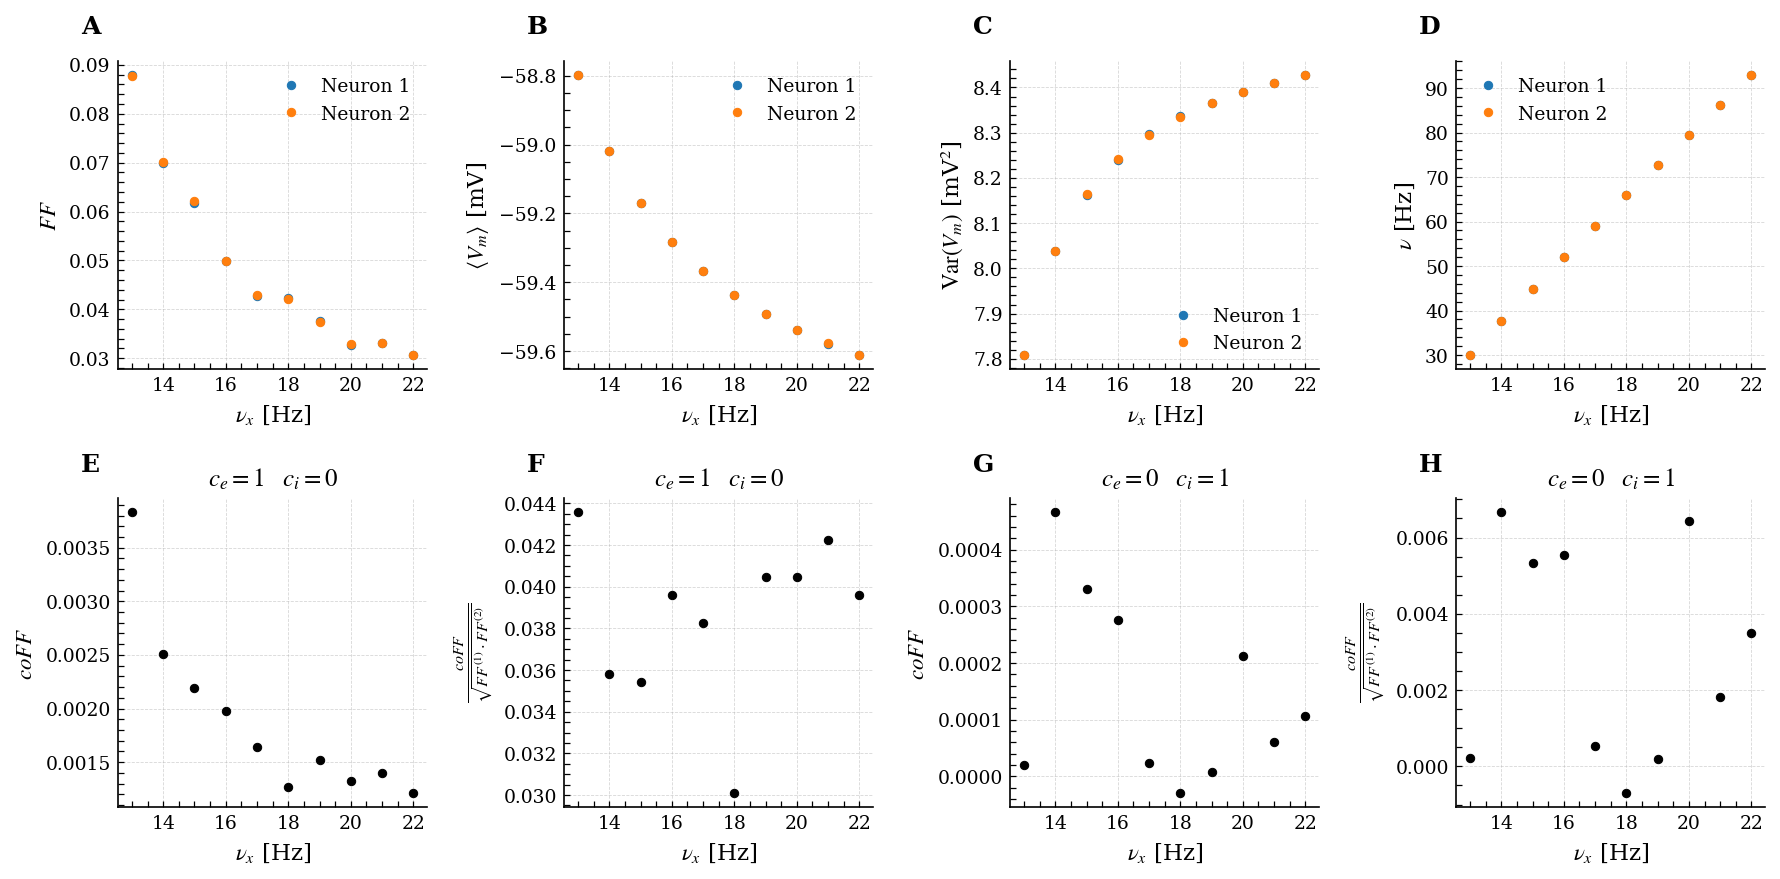

In [50]:
set_style()
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(2, 4, figure=fig)

# marginal statistics, E shared with spike

ax = fig.add_subplot(gs[0, 0])
ax.plot(df_E_S["nu_x"], df_E_S["fano_factor_1"], 'o', label="Neuron 1")
ax.plot(df_E_S["nu_x"], df_E_S["fano_factor_2"], 'o', label="Neuron 2")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$FF$")

ax = fig.add_subplot(gs[0, 1])
ax.plot(df_E_S["nu_x"], df_E_S["mean_V_1"], 'o', label="Neuron 1")
ax.plot(df_E_S["nu_x"], df_E_S["mean_V_2"], 'o', label="Neuron 2")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\langle V_m \rangle$ [mV]")

ax = fig.add_subplot(gs[0, 2])
ax.plot(df_E_S["nu_x"], df_E_S["var_V_1"], 'o', label="Neuron 1")
ax.plot(df_E_S["nu_x"], df_E_S["var_V_2"], 'o', label="Neuron 2")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Var}(V_m)$ [mV$^2$]")

ax = fig.add_subplot(gs[0, 3])
ax.plot(df_E_S["nu_x"], df_E_S["nu_1"], 'o', label="Neuron 1")
ax.plot(df_E_S["nu_x"], df_E_S["nu_2"], 'o', label="Neuron 2")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\nu$ [Hz]")

# joint staitistics, E shared with spike

ax = fig.add_subplot(gs[1, 0])
ax.plot(df_E_S["nu_x"], df_E_S["co_fano_factor"], 'o', color="black")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$coFF$")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)

ax = fig.add_subplot(gs[1, 1])
ax.plot(df_E_S["nu_x"], df_E_S["co_fano_factor"] / np.sqrt(df_E_S["fano_factor_1"] * df_E_S["fano_factor_2"]), 'o', color="black")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\frac{coFF}{\sqrt{FF^{(1)} \cdot FF^{(2)}}}$")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)

# joint statistics, I shared with spike
ax = fig.add_subplot(gs[1, 2])
ax.plot(df_I_S["nu_x"], df_I_S["co_fano_factor"], 'o', color="black")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$coFF$")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)

ax = fig.add_subplot(gs[1, 3])
ax.plot(df_I_S["nu_x"], df_I_S["co_fano_factor"] / np.sqrt(df_I_S["fano_factor_1"] * df_I_S["fano_factor_2"]), 'o', color="black")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\frac{coFF}{\sqrt{FF^{(1)} \cdot FF^{(2)}}}$")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)

for i, ax in enumerate(fig.axes):
    ax.tick_params(which="both", width=0.6, length=3)
    ax.legend(frameon=False)
    # ax.set_xlim(left=7)
    ax.text(-0.12, 1.15, chr(65+i), transform=ax.transAxes,
            fontsize=12, fontweight='bold', va="top", ha="left")

plt.tight_layout()
# savefig(fig, "fig1.png")
plt.show()

In [62]:
# with spike, only E shared

trials = collect_data("../../outputs/conductance/double_lif/delta_synapse/spike_reset/no_refractory/current/nu_x_E/20251112-131615-pGr1zsNp")

c_e, c_i = 0.1, 0.0

rows = []
for params, results in trials:
    row = {}
    if params["c_e"] == c_e and params["c_i"] == c_i:
        row.update(params)
        for k, v in results.items():
            if np.ndim(v) == 0 or (isinstance(v, np.ndarray) and v.size == 1):
                row[k] = float(np.ravel(v)[0])
            elif (isinstance(v, np.ndarray) and v.size == 2):
                row[k+"_1"] = float(v[0])
                row[k+"_2"] = float(v[1])
        rows.append(row)
df = pd.DataFrame(rows)
df = df.sort_values(by="nu_x")
df_E_S = df.copy()

# with spike, only I shared

trials = collect_data("../../outputs/conductance/double_lif/delta_synapse/spike_reset/no_refractory/current/nu_x_I/20251112-132411-gRCyQNa1")

c_e, c_i = 0, 1

rows = []
for params, results in trials:
    row = {}
    if params["c_e"] == c_e and params["c_i"] == c_i:
        row.update(params)
        for k, v in results.items():
            if np.ndim(v) == 0 or (isinstance(v, np.ndarray) and v.size == 1):
                row[k] = float(np.ravel(v)[0])
            elif (isinstance(v, np.ndarray) and v.size == 2):
                row[k+"_1"] = float(v[0])
                row[k+"_2"] = float(v[1])
        rows.append(row)
df = pd.DataFrame(rows)
df = df.sort_values(by="nu_x")
df_I_S = df.copy()

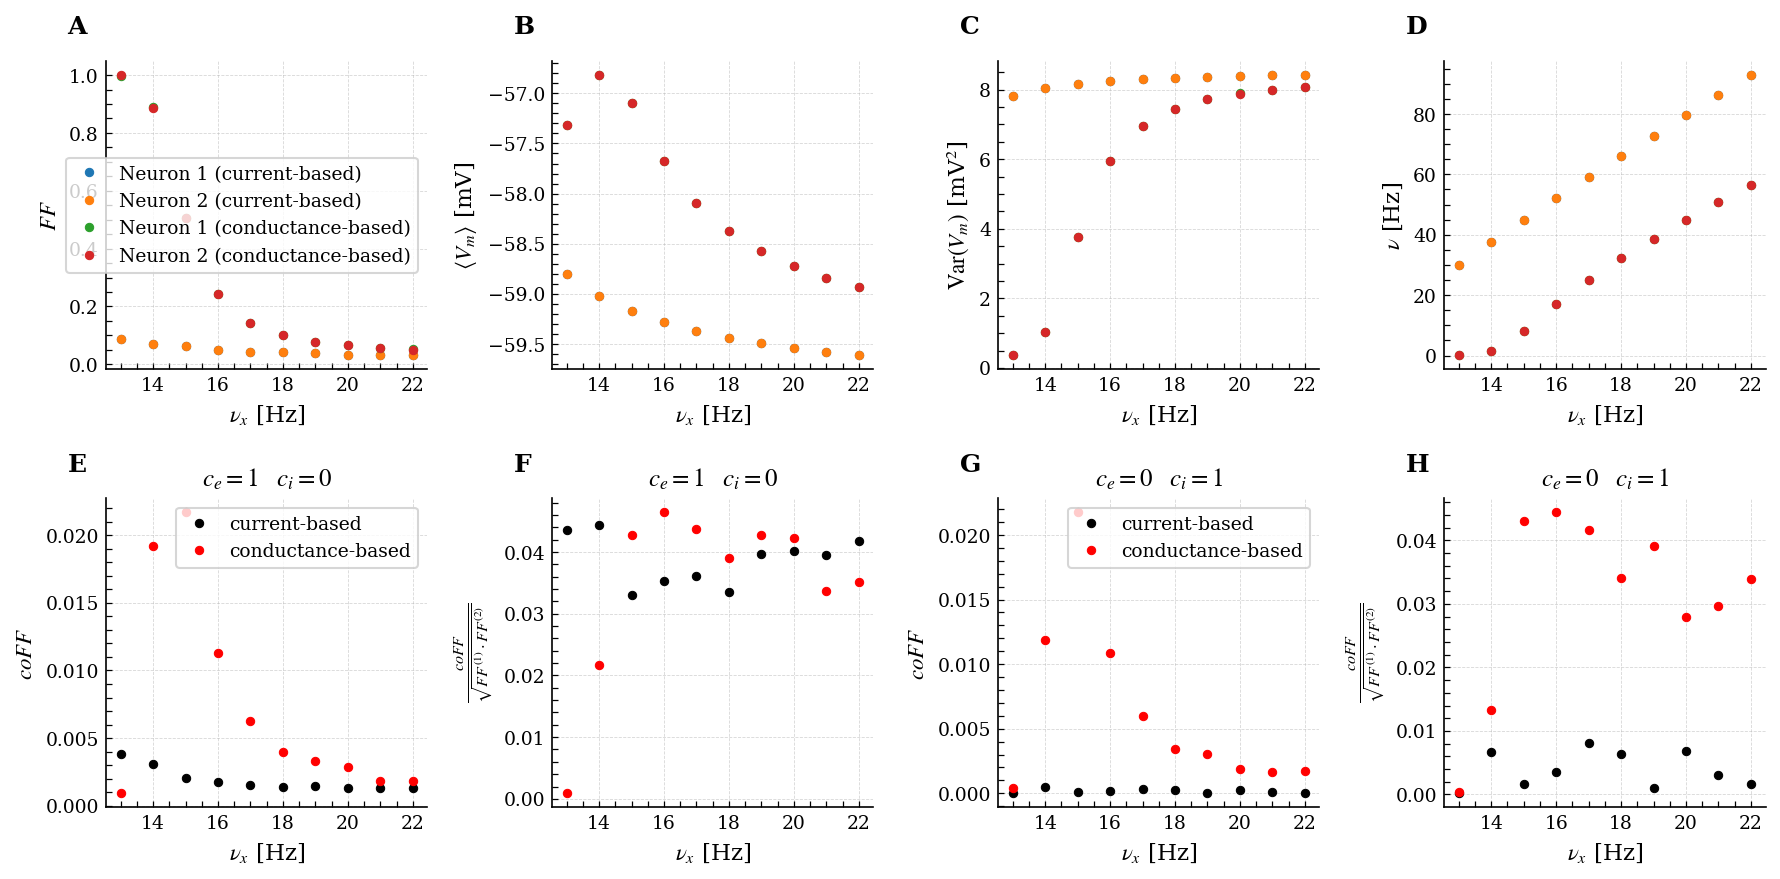

In [63]:
set_style()
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(2, 4, figure=fig)

# marginal statistics, E shared with spike

ax = fig.add_subplot(gs[0, 0])
ax.plot(df_E_S[df_E_S["current_based_ref"] == True]["nu_x"], df_E_S[df_E_S["current_based_ref"] == True]["fano_factor_1"], 'o', label="Neuron 1 (current-based)")
ax.plot(df_E_S[df_E_S["current_based_ref"] == True]["nu_x"], df_E_S[df_E_S["current_based_ref"] == True]["fano_factor_2"], 'o', label="Neuron 2 (current-based)")
ax.plot(df_E_S[df_E_S["current_based_ref"] == False]["nu_x"], df_E_S[df_E_S["current_based_ref"] == False]["fano_factor_1"], 'o', label="Neuron 1 (conductance-based)")
ax.plot(df_E_S[df_E_S["current_based_ref"] == False]["nu_x"], df_E_S[df_E_S["current_based_ref"] == False]["fano_factor_2"], 'o', label="Neuron 2 (conductance-based)")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$FF$")
ax.legend(frameon=True)

ax = fig.add_subplot(gs[0, 1])
ax.plot(df_E_S[df_E_S["current_based_ref"] == True]["nu_x"], df_E_S[df_E_S["current_based_ref"] == True]["mean_V_1"], 'o', label="Neuron 1 (current-based)")
ax.plot(df_E_S[df_E_S["current_based_ref"] == True]["nu_x"], df_E_S[df_E_S["current_based_ref"] == True]["mean_V_2"], 'o', label="Neuron 2 (current-based)")
ax.plot(df_E_S[df_E_S["current_based_ref"] == False]["nu_x"], df_E_S[df_E_S["current_based_ref"] == False]["mean_V_1"], 'o', label="Neuron 1 (conductance-based)")
ax.plot(df_E_S[df_E_S["current_based_ref"] == False]["nu_x"], df_E_S[df_E_S["current_based_ref"] == False]["mean_V_2"], 'o', label="Neuron 2 (conductance-based)")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\langle V_m \rangle$ [mV]")

ax = fig.add_subplot(gs[0, 2])
ax.plot(df_E_S[df_E_S["current_based_ref"] == True]["nu_x"], df_E_S[df_E_S["current_based_ref"] == True]["var_V_1"], 'o', label="Neuron 1 (current-based)")
ax.plot(df_E_S[df_E_S["current_based_ref"] == True]["nu_x"], df_E_S[df_E_S["current_based_ref"] == True]["var_V_2"], 'o', label="Neuron 2 (current-based)")
ax.plot(df_E_S[df_E_S["current_based_ref"] == False]["nu_x"], df_E_S[df_E_S["current_based_ref"] == False]["var_V_1"], 'o', label="Neuron 1 (conductance-based)")
ax.plot(df_E_S[df_E_S["current_based_ref"] == False]["nu_x"], df_E_S[df_E_S["current_based_ref"] == False]["var_V_2"], 'o', label="Neuron 2 (conductance-based)")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Var}(V_m)$ [mV$^2$]")

ax = fig.add_subplot(gs[0, 3])
ax.plot(df_E_S[df_E_S["current_based_ref"] == True]["nu_x"], df_E_S[df_E_S["current_based_ref"] == True]["nu_1"], 'o', label="Neuron 1 (current-based)")
ax.plot(df_E_S[df_E_S["current_based_ref"] == True]["nu_x"], df_E_S[df_E_S["current_based_ref"] == True]["nu_2"], 'o', label="Neuron 2 (current-based)")
ax.plot(df_E_S[df_E_S["current_based_ref"] == False]["nu_x"], df_E_S[df_E_S["current_based_ref"] == False]["nu_1"], 'o', label="Neuron 1 (conductance-based)")
ax.plot(df_E_S[df_E_S["current_based_ref"] == False]["nu_x"], df_E_S[df_E_S["current_based_ref"] == False]["nu_2"], 'o', label="Neuron 2 (conductance-based)")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\nu$ [Hz]")

# joint staitistics, E shared with spike

ax = fig.add_subplot(gs[1, 0])
ax.plot(df_E_S[df_E_S["current_based_ref"] == True]["nu_x"], df_E_S[df_E_S["current_based_ref"] == True]["co_fano_factor"], 'o', color="black", label="current-based")
ax.plot(df_E_S[df_E_S["current_based_ref"] == False]["nu_x"], df_E_S[df_E_S["current_based_ref"] == False]["co_fano_factor"], 'o', color="red", label="conductance-based")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$coFF$")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)
ax.legend(frameon=True)

ax = fig.add_subplot(gs[1, 1])
ax.plot(df_E_S[df_E_S["current_based_ref"] == True]["nu_x"], df_E_S[df_E_S["current_based_ref"] == True]["co_fano_factor"] / np.sqrt(df_E_S[df_E_S["current_based_ref"] == True]["fano_factor_1"] * df_E_S[df_E_S["current_based_ref"] == True]["fano_factor_2"]), 'o', color="black", label="current-based")
ax.plot(df_E_S[df_E_S["current_based_ref"] == False]["nu_x"], df_E_S[df_E_S["current_based_ref"] == False]["co_fano_factor"] / np.sqrt(df_E_S[df_E_S["current_based_ref"] == False]["fano_factor_1"] * df_E_S[df_E_S["current_based_ref"] == False]["fano_factor_2"]), 'o', color="red", label="conductance-based")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\frac{coFF}{\sqrt{FF^{(1)} \cdot FF^{(2)}}}$")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)

# joint statistics, I shared with spike
ax = fig.add_subplot(gs[1, 2])
ax.plot(df_I_S[df_I_S["current_based_ref"] == True]["nu_x"], df_I_S[df_I_S["current_based_ref"] == True]["co_fano_factor"], 'o', color="black", label="current-based")
ax.plot(df_I_S[df_I_S["current_based_ref"] == False]["nu_x"], df_I_S[df_I_S["current_based_ref"] == False]["co_fano_factor"], 'o', color="red", label="conductance-based")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$coFF$")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)
ax.legend(frameon=True)

ax = fig.add_subplot(gs[1, 3])
ax.plot(df_I_S[df_I_S["current_based_ref"] == True]["nu_x"], df_I_S[df_I_S["current_based_ref"] == True]["co_fano_factor"] / np.sqrt(df_I_S[df_I_S["current_based_ref"] == True]["fano_factor_1"] * df_I_S[df_I_S["current_based_ref"] == True]["fano_factor_2"]), 'o', color="black", label="current-based")
ax.plot(df_I_S[df_I_S["current_based_ref"] == False]["nu_x"], df_I_S[df_I_S["current_based_ref"] == False]["co_fano_factor"] / np.sqrt(df_I_S[df_I_S["current_based_ref"] == False]["fano_factor_1"] * df_I_S[df_I_S["current_based_ref"] == False]["fano_factor_2"]), 'o', color="red", label="conductance-based")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\frac{coFF}{\sqrt{FF^{(1)} \cdot FF^{(2)}}}$")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)

for i, ax in enumerate(fig.axes):
    ax.tick_params(which="both", width=0.6, length=3)
    # ax.set_xlim(left=7)
    ax.text(-0.12, 1.15, chr(65+i), transform=ax.transAxes,
            fontsize=12, fontweight='bold', va="top", ha="left")

plt.tight_layout()
# savefig(fig, "fig1.png")
plt.show()

In [64]:
# with spike, only E shared

trials = collect_data("../../outputs/conductance/double_lif/delta_synapse/spike_reset/no_refractory/current/nu_x_E/20251112-133243-K6wS9aBb")

c_e, c_i = 0.1, 0.0

rows = []
for params, results in trials:
    row = {}
    if params["c_e"] == c_e and params["c_i"] == c_i:
        row.update(params)
        for k, v in results.items():
            if np.ndim(v) == 0 or (isinstance(v, np.ndarray) and v.size == 1):
                row[k] = float(np.ravel(v)[0])
            elif (isinstance(v, np.ndarray) and v.size == 2):
                row[k+"_1"] = float(v[0])
                row[k+"_2"] = float(v[1])
        rows.append(row)
df = pd.DataFrame(rows)
df = df.sort_values(by="nu_x")
df_E_S = df.copy()

# with spike, only I shared

trials = collect_data("../../outputs/conductance/double_lif/delta_synapse/spike_reset/no_refractory/current/nu_x_I/20251112-132411-gRCyQNa1")

c_e, c_i = 0, 1

rows = []
for params, results in trials:
    row = {}
    if params["c_e"] == c_e and params["c_i"] == c_i:
        row.update(params)
        for k, v in results.items():
            if np.ndim(v) == 0 or (isinstance(v, np.ndarray) and v.size == 1):
                row[k] = float(np.ravel(v)[0])
            elif (isinstance(v, np.ndarray) and v.size == 2):
                row[k+"_1"] = float(v[0])
                row[k+"_2"] = float(v[1])
        rows.append(row)
df = pd.DataFrame(rows)
df = df.sort_values(by="nu_x")
df_I_S = df.copy()

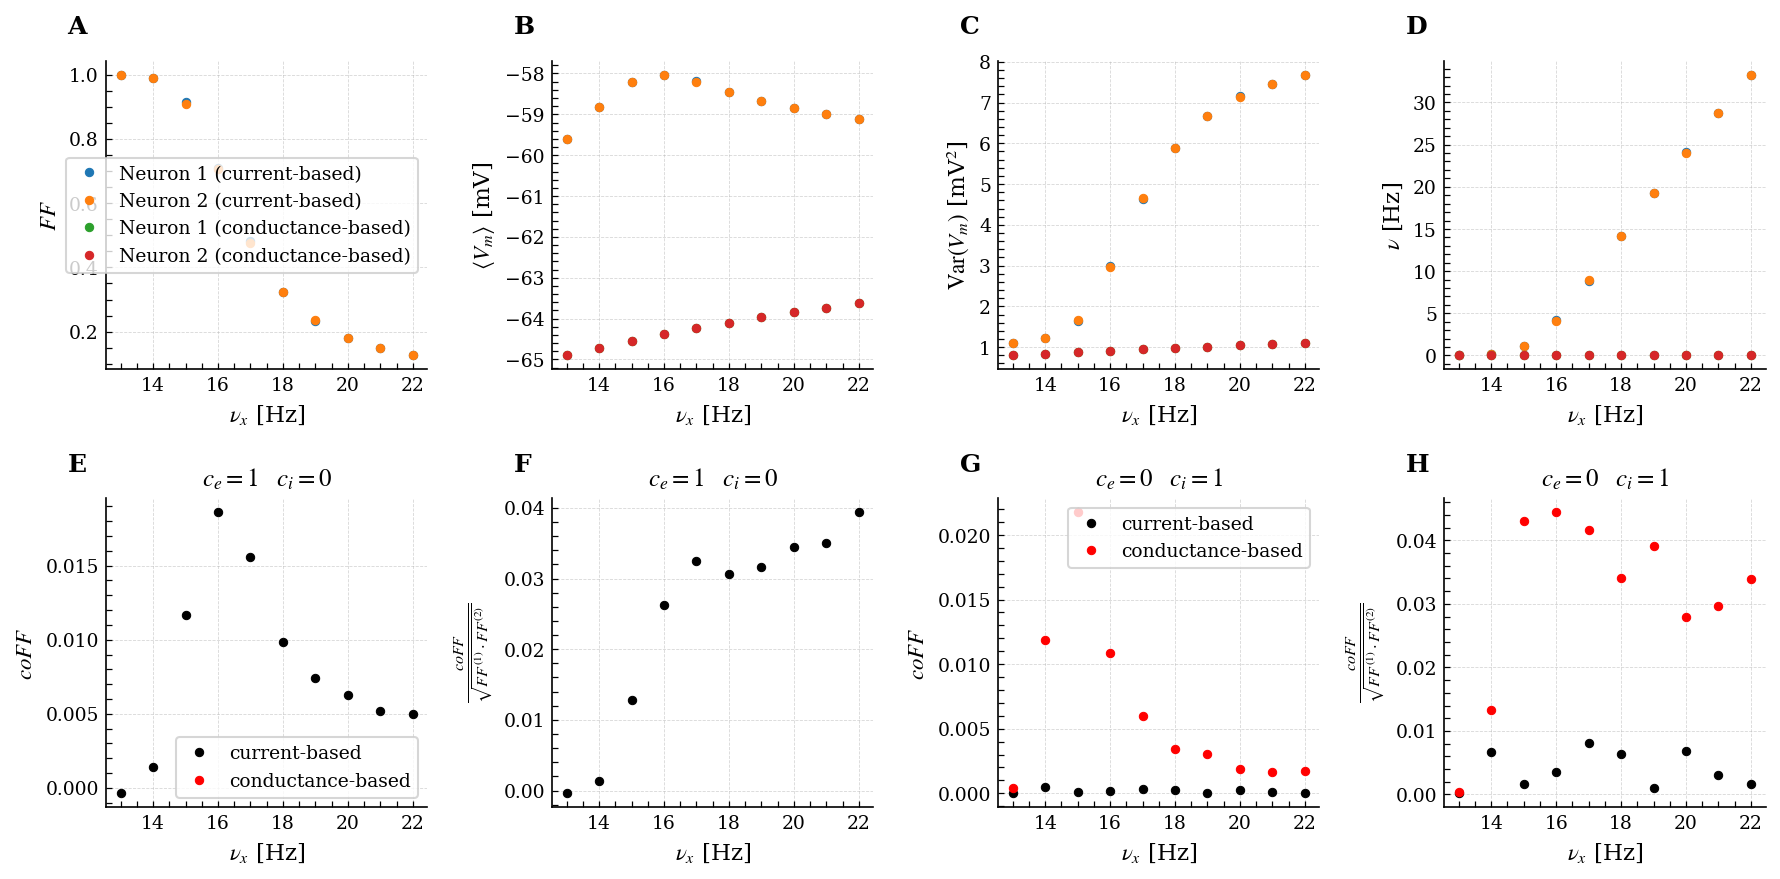

In [65]:
set_style()
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(2, 4, figure=fig)

# marginal statistics, E shared with spike

ax = fig.add_subplot(gs[0, 0])
ax.plot(df_E_S[df_E_S["current_based_ref"] == True]["nu_x"], df_E_S[df_E_S["current_based_ref"] == True]["fano_factor_1"], 'o', label="Neuron 1 (current-based)")
ax.plot(df_E_S[df_E_S["current_based_ref"] == True]["nu_x"], df_E_S[df_E_S["current_based_ref"] == True]["fano_factor_2"], 'o', label="Neuron 2 (current-based)")
ax.plot(df_E_S[df_E_S["current_based_ref"] == False]["nu_x"], df_E_S[df_E_S["current_based_ref"] == False]["fano_factor_1"], 'o', label="Neuron 1 (conductance-based)")
ax.plot(df_E_S[df_E_S["current_based_ref"] == False]["nu_x"], df_E_S[df_E_S["current_based_ref"] == False]["fano_factor_2"], 'o', label="Neuron 2 (conductance-based)")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$FF$")
ax.legend(frameon=True)

ax = fig.add_subplot(gs[0, 1])
ax.plot(df_E_S[df_E_S["current_based_ref"] == True]["nu_x"], df_E_S[df_E_S["current_based_ref"] == True]["mean_V_1"], 'o', label="Neuron 1 (current-based)")
ax.plot(df_E_S[df_E_S["current_based_ref"] == True]["nu_x"], df_E_S[df_E_S["current_based_ref"] == True]["mean_V_2"], 'o', label="Neuron 2 (current-based)")
ax.plot(df_E_S[df_E_S["current_based_ref"] == False]["nu_x"], df_E_S[df_E_S["current_based_ref"] == False]["mean_V_1"], 'o', label="Neuron 1 (conductance-based)")
ax.plot(df_E_S[df_E_S["current_based_ref"] == False]["nu_x"], df_E_S[df_E_S["current_based_ref"] == False]["mean_V_2"], 'o', label="Neuron 2 (conductance-based)")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\langle V_m \rangle$ [mV]")

ax = fig.add_subplot(gs[0, 2])
ax.plot(df_E_S[df_E_S["current_based_ref"] == True]["nu_x"], df_E_S[df_E_S["current_based_ref"] == True]["var_V_1"], 'o', label="Neuron 1 (current-based)")
ax.plot(df_E_S[df_E_S["current_based_ref"] == True]["nu_x"], df_E_S[df_E_S["current_based_ref"] == True]["var_V_2"], 'o', label="Neuron 2 (current-based)")
ax.plot(df_E_S[df_E_S["current_based_ref"] == False]["nu_x"], df_E_S[df_E_S["current_based_ref"] == False]["var_V_1"], 'o', label="Neuron 1 (conductance-based)")
ax.plot(df_E_S[df_E_S["current_based_ref"] == False]["nu_x"], df_E_S[df_E_S["current_based_ref"] == False]["var_V_2"], 'o', label="Neuron 2 (conductance-based)")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Var}(V_m)$ [mV$^2$]")

ax = fig.add_subplot(gs[0, 3])
ax.plot(df_E_S[df_E_S["current_based_ref"] == True]["nu_x"], df_E_S[df_E_S["current_based_ref"] == True]["nu_1"], 'o', label="Neuron 1 (current-based)")
ax.plot(df_E_S[df_E_S["current_based_ref"] == True]["nu_x"], df_E_S[df_E_S["current_based_ref"] == True]["nu_2"], 'o', label="Neuron 2 (current-based)")
ax.plot(df_E_S[df_E_S["current_based_ref"] == False]["nu_x"], df_E_S[df_E_S["current_based_ref"] == False]["nu_1"], 'o', label="Neuron 1 (conductance-based)")
ax.plot(df_E_S[df_E_S["current_based_ref"] == False]["nu_x"], df_E_S[df_E_S["current_based_ref"] == False]["nu_2"], 'o', label="Neuron 2 (conductance-based)")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\nu$ [Hz]")

# joint staitistics, E shared with spike

ax = fig.add_subplot(gs[1, 0])
ax.plot(df_E_S[df_E_S["current_based_ref"] == True]["nu_x"], df_E_S[df_E_S["current_based_ref"] == True]["co_fano_factor"], 'o', color="black", label="current-based")
ax.plot(df_E_S[df_E_S["current_based_ref"] == False]["nu_x"], df_E_S[df_E_S["current_based_ref"] == False]["co_fano_factor"], 'o', color="red", label="conductance-based")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$coFF$")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)
ax.legend(frameon=True)

ax = fig.add_subplot(gs[1, 1])
ax.plot(df_E_S[df_E_S["current_based_ref"] == True]["nu_x"], df_E_S[df_E_S["current_based_ref"] == True]["co_fano_factor"] / np.sqrt(df_E_S[df_E_S["current_based_ref"] == True]["fano_factor_1"] * df_E_S[df_E_S["current_based_ref"] == True]["fano_factor_2"]), 'o', color="black", label="current-based")
ax.plot(df_E_S[df_E_S["current_based_ref"] == False]["nu_x"], df_E_S[df_E_S["current_based_ref"] == False]["co_fano_factor"] / np.sqrt(df_E_S[df_E_S["current_based_ref"] == False]["fano_factor_1"] * df_E_S[df_E_S["current_based_ref"] == False]["fano_factor_2"]), 'o', color="red", label="conductance-based")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\frac{coFF}{\sqrt{FF^{(1)} \cdot FF^{(2)}}}$")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)

# joint statistics, I shared with spike
ax = fig.add_subplot(gs[1, 2])
ax.plot(df_I_S[df_I_S["current_based_ref"] == True]["nu_x"], df_I_S[df_I_S["current_based_ref"] == True]["co_fano_factor"], 'o', color="black", label="current-based")
ax.plot(df_I_S[df_I_S["current_based_ref"] == False]["nu_x"], df_I_S[df_I_S["current_based_ref"] == False]["co_fano_factor"], 'o', color="red", label="conductance-based")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$coFF$")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)
ax.legend(frameon=True)

ax = fig.add_subplot(gs[1, 3])
ax.plot(df_I_S[df_I_S["current_based_ref"] == True]["nu_x"], df_I_S[df_I_S["current_based_ref"] == True]["co_fano_factor"] / np.sqrt(df_I_S[df_I_S["current_based_ref"] == True]["fano_factor_1"] * df_I_S[df_I_S["current_based_ref"] == True]["fano_factor_2"]), 'o', color="black", label="current-based")
ax.plot(df_I_S[df_I_S["current_based_ref"] == False]["nu_x"], df_I_S[df_I_S["current_based_ref"] == False]["co_fano_factor"] / np.sqrt(df_I_S[df_I_S["current_based_ref"] == False]["fano_factor_1"] * df_I_S[df_I_S["current_based_ref"] == False]["fano_factor_2"]), 'o', color="red", label="conductance-based")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\frac{coFF}{\sqrt{FF^{(1)} \cdot FF^{(2)}}}$")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)

for i, ax in enumerate(fig.axes):
    ax.tick_params(which="both", width=0.6, length=3)
    # ax.set_xlim(left=7)
    ax.text(-0.12, 1.15, chr(65+i), transform=ax.transAxes,
            fontsize=12, fontweight='bold', va="top", ha="left")

plt.tight_layout()
# savefig(fig, "fig1.png")
plt.show()

In [66]:
# with spike, only E shared

trials = collect_data("../../outputs/conductance/double_lif/delta_synapse/spike_reset/no_refractory/current/nu_x_E/20251112-141051-dHiQLArP")

c_e, c_i = 0.1, 0.0

rows = []
for params, results in trials:
    row = {}
    if params["c_e"] == c_e and params["c_i"] == c_i:
        row.update(params)
        for k, v in results.items():
            if np.ndim(v) == 0 or (isinstance(v, np.ndarray) and v.size == 1):
                row[k] = float(np.ravel(v)[0])
            elif (isinstance(v, np.ndarray) and v.size == 2):
                row[k+"_1"] = float(v[0])
                row[k+"_2"] = float(v[1])
        rows.append(row)
df = pd.DataFrame(rows)
df = df.sort_values(by="nu_x")
df_E_S = df.copy()

# with spike, only I shared

trials = collect_data("../../outputs/conductance/double_lif/delta_synapse/spike_reset/no_refractory/current/nu_x_I/20251112-132411-gRCyQNa1")

c_e, c_i = 0, 1

rows = []
for params, results in trials:
    row = {}
    if params["c_e"] == c_e and params["c_i"] == c_i:
        row.update(params)
        for k, v in results.items():
            if np.ndim(v) == 0 or (isinstance(v, np.ndarray) and v.size == 1):
                row[k] = float(np.ravel(v)[0])
            elif (isinstance(v, np.ndarray) and v.size == 2):
                row[k+"_1"] = float(v[0])
                row[k+"_2"] = float(v[1])
        rows.append(row)
df = pd.DataFrame(rows)
df = df.sort_values(by="nu_x")
df_I_S = df.copy()

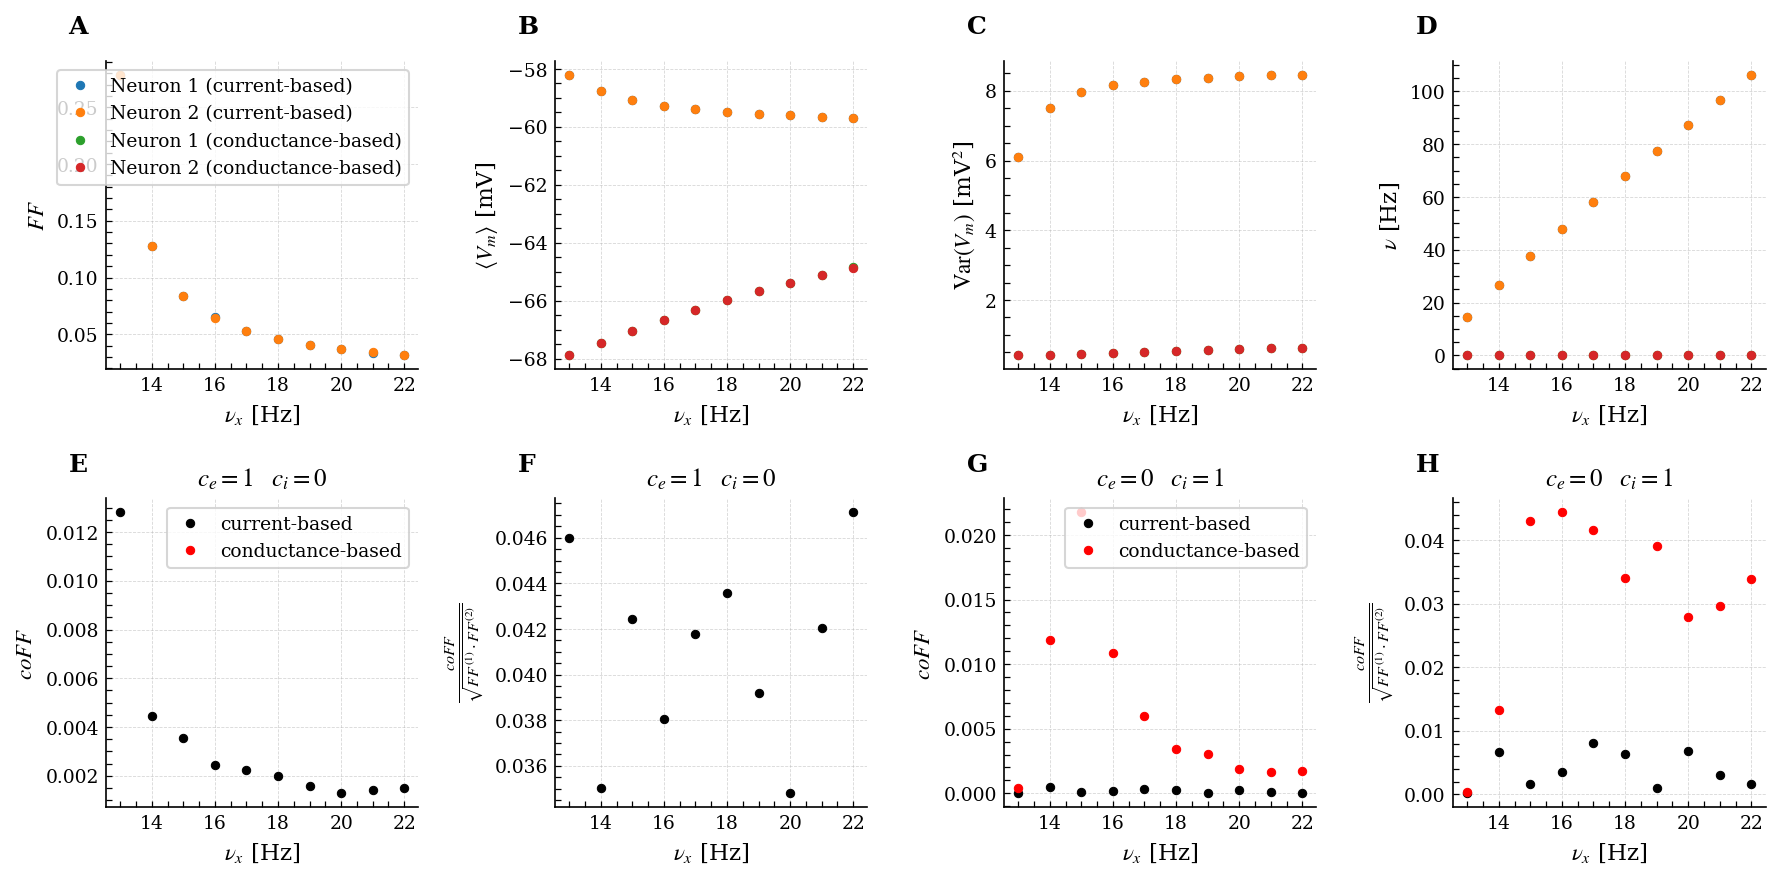

In [67]:
set_style()
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(2, 4, figure=fig)

# marginal statistics, E shared with spike

ax = fig.add_subplot(gs[0, 0])
ax.plot(df_E_S[df_E_S["current_based_ref"] == True]["nu_x"], df_E_S[df_E_S["current_based_ref"] == True]["fano_factor_1"], 'o', label="Neuron 1 (current-based)")
ax.plot(df_E_S[df_E_S["current_based_ref"] == True]["nu_x"], df_E_S[df_E_S["current_based_ref"] == True]["fano_factor_2"], 'o', label="Neuron 2 (current-based)")
ax.plot(df_E_S[df_E_S["current_based_ref"] == False]["nu_x"], df_E_S[df_E_S["current_based_ref"] == False]["fano_factor_1"], 'o', label="Neuron 1 (conductance-based)")
ax.plot(df_E_S[df_E_S["current_based_ref"] == False]["nu_x"], df_E_S[df_E_S["current_based_ref"] == False]["fano_factor_2"], 'o', label="Neuron 2 (conductance-based)")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$FF$")
ax.legend(frameon=True)

ax = fig.add_subplot(gs[0, 1])
ax.plot(df_E_S[df_E_S["current_based_ref"] == True]["nu_x"], df_E_S[df_E_S["current_based_ref"] == True]["mean_V_1"], 'o', label="Neuron 1 (current-based)")
ax.plot(df_E_S[df_E_S["current_based_ref"] == True]["nu_x"], df_E_S[df_E_S["current_based_ref"] == True]["mean_V_2"], 'o', label="Neuron 2 (current-based)")
ax.plot(df_E_S[df_E_S["current_based_ref"] == False]["nu_x"], df_E_S[df_E_S["current_based_ref"] == False]["mean_V_1"], 'o', label="Neuron 1 (conductance-based)")
ax.plot(df_E_S[df_E_S["current_based_ref"] == False]["nu_x"], df_E_S[df_E_S["current_based_ref"] == False]["mean_V_2"], 'o', label="Neuron 2 (conductance-based)")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\langle V_m \rangle$ [mV]")

ax = fig.add_subplot(gs[0, 2])
ax.plot(df_E_S[df_E_S["current_based_ref"] == True]["nu_x"], df_E_S[df_E_S["current_based_ref"] == True]["var_V_1"], 'o', label="Neuron 1 (current-based)")
ax.plot(df_E_S[df_E_S["current_based_ref"] == True]["nu_x"], df_E_S[df_E_S["current_based_ref"] == True]["var_V_2"], 'o', label="Neuron 2 (current-based)")
ax.plot(df_E_S[df_E_S["current_based_ref"] == False]["nu_x"], df_E_S[df_E_S["current_based_ref"] == False]["var_V_1"], 'o', label="Neuron 1 (conductance-based)")
ax.plot(df_E_S[df_E_S["current_based_ref"] == False]["nu_x"], df_E_S[df_E_S["current_based_ref"] == False]["var_V_2"], 'o', label="Neuron 2 (conductance-based)")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Var}(V_m)$ [mV$^2$]")

ax = fig.add_subplot(gs[0, 3])
ax.plot(df_E_S[df_E_S["current_based_ref"] == True]["nu_x"], df_E_S[df_E_S["current_based_ref"] == True]["nu_1"], 'o', label="Neuron 1 (current-based)")
ax.plot(df_E_S[df_E_S["current_based_ref"] == True]["nu_x"], df_E_S[df_E_S["current_based_ref"] == True]["nu_2"], 'o', label="Neuron 2 (current-based)")
ax.plot(df_E_S[df_E_S["current_based_ref"] == False]["nu_x"], df_E_S[df_E_S["current_based_ref"] == False]["nu_1"], 'o', label="Neuron 1 (conductance-based)")
ax.plot(df_E_S[df_E_S["current_based_ref"] == False]["nu_x"], df_E_S[df_E_S["current_based_ref"] == False]["nu_2"], 'o', label="Neuron 2 (conductance-based)")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\nu$ [Hz]")

# joint staitistics, E shared with spike

ax = fig.add_subplot(gs[1, 0])
ax.plot(df_E_S[df_E_S["current_based_ref"] == True]["nu_x"], df_E_S[df_E_S["current_based_ref"] == True]["co_fano_factor"], 'o', color="black", label="current-based")
ax.plot(df_E_S[df_E_S["current_based_ref"] == False]["nu_x"], df_E_S[df_E_S["current_based_ref"] == False]["co_fano_factor"], 'o', color="red", label="conductance-based")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$coFF$")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)
ax.legend(frameon=True)

ax = fig.add_subplot(gs[1, 1])
ax.plot(df_E_S[df_E_S["current_based_ref"] == True]["nu_x"], df_E_S[df_E_S["current_based_ref"] == True]["co_fano_factor"] / np.sqrt(df_E_S[df_E_S["current_based_ref"] == True]["fano_factor_1"] * df_E_S[df_E_S["current_based_ref"] == True]["fano_factor_2"]), 'o', color="black", label="current-based")
ax.plot(df_E_S[df_E_S["current_based_ref"] == False]["nu_x"], df_E_S[df_E_S["current_based_ref"] == False]["co_fano_factor"] / np.sqrt(df_E_S[df_E_S["current_based_ref"] == False]["fano_factor_1"] * df_E_S[df_E_S["current_based_ref"] == False]["fano_factor_2"]), 'o', color="red", label="conductance-based")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\frac{coFF}{\sqrt{FF^{(1)} \cdot FF^{(2)}}}$")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)

# joint statistics, I shared with spike
ax = fig.add_subplot(gs[1, 2])
ax.plot(df_I_S[df_I_S["current_based_ref"] == True]["nu_x"], df_I_S[df_I_S["current_based_ref"] == True]["co_fano_factor"], 'o', color="black", label="current-based")
ax.plot(df_I_S[df_I_S["current_based_ref"] == False]["nu_x"], df_I_S[df_I_S["current_based_ref"] == False]["co_fano_factor"], 'o', color="red", label="conductance-based")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$coFF$")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)
ax.legend(frameon=True)

ax = fig.add_subplot(gs[1, 3])
ax.plot(df_I_S[df_I_S["current_based_ref"] == True]["nu_x"], df_I_S[df_I_S["current_based_ref"] == True]["co_fano_factor"] / np.sqrt(df_I_S[df_I_S["current_based_ref"] == True]["fano_factor_1"] * df_I_S[df_I_S["current_based_ref"] == True]["fano_factor_2"]), 'o', color="black", label="current-based")
ax.plot(df_I_S[df_I_S["current_based_ref"] == False]["nu_x"], df_I_S[df_I_S["current_based_ref"] == False]["co_fano_factor"] / np.sqrt(df_I_S[df_I_S["current_based_ref"] == False]["fano_factor_1"] * df_I_S[df_I_S["current_based_ref"] == False]["fano_factor_2"]), 'o', color="red", label="conductance-based")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\frac{coFF}{\sqrt{FF^{(1)} \cdot FF^{(2)}}}$")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)

for i, ax in enumerate(fig.axes):
    ax.tick_params(which="both", width=0.6, length=3)
    # ax.set_xlim(left=7)
    ax.text(-0.12, 1.15, chr(65+i), transform=ax.transAxes,
            fontsize=12, fontweight='bold', va="top", ha="left")

plt.tight_layout()
# savefig(fig, "fig1.png")
plt.show()